<a href="https://colab.research.google.com/github/basakozgurr/bedlab_project/blob/main/hafta_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVI19 Turkey Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

In [ ]:
plt.style.use('ggplot')

In [ ]:
csv_file_url = 'https://drive.google.com/uc?export=view&id=11SJRu_ghaKQCmKTNP6avuSgOr_RqB7tx'
dataset = pd.read_csv(csv_file_url, sep=';', index_col=0)
dataset.index = pd.to_datetime(dataset.index, format='%d.%m.%Y')
dataset.head(10)

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-11,0,1,0,0,0,0
2020-03-12,0,0,0,0,0,0
2020-03-13,0,4,0,0,0,0
2020-03-14,0,0,0,0,0,0
2020-03-15,2800,1,0,0,0,0
2020-03-16,0,12,0,0,0,0
2020-03-17,0,29,0,0,0,1
2020-03-18,7197,51,0,0,0,0
2020-03-19,1981,94,0,0,0,2


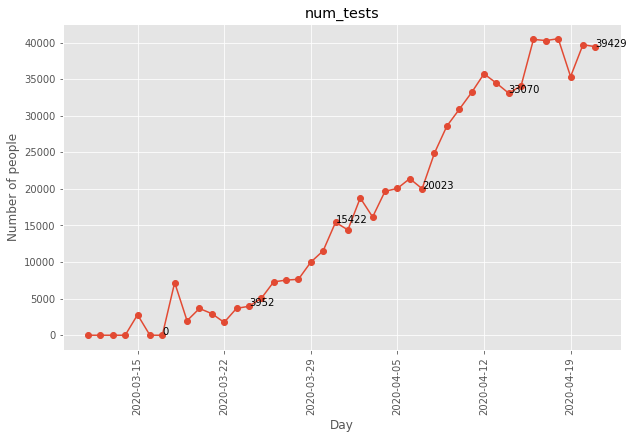

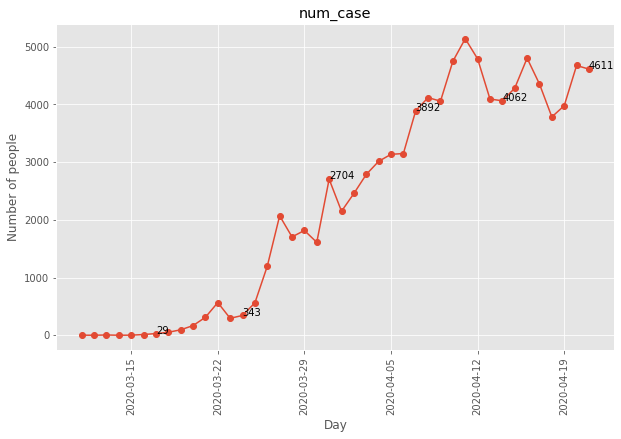

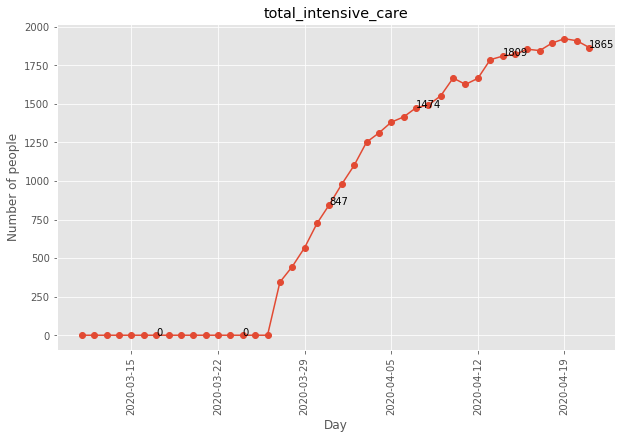

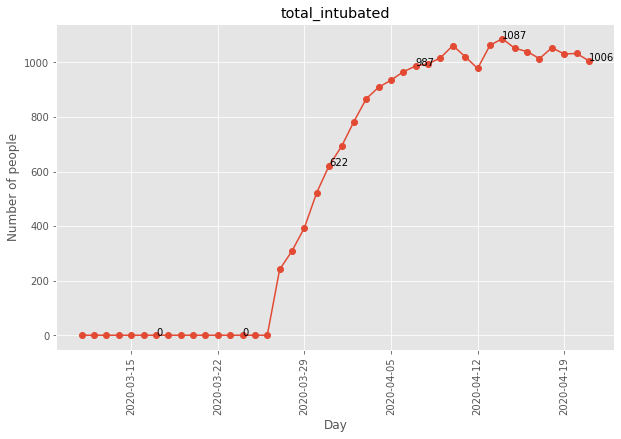

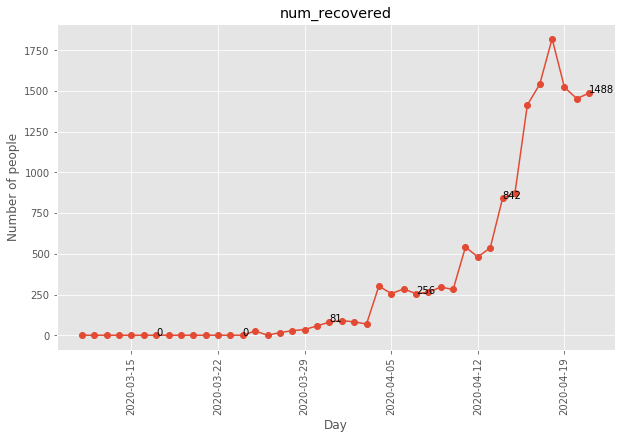

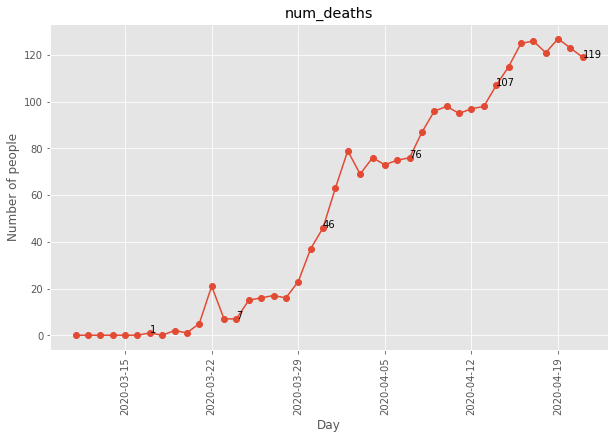

In [ ]:
for i, col in enumerate(dataset.columns.tolist()):
    plt.figure(figsize=(10, 6))
    x_axis = dataset.index.values
    y_axis = dataset[col].values
    plt.plot(x_axis, y_axis, label=col,marker='o')
    plt.title(col)
    plt.xlabel("Day")
    plt.ylabel("Number of people")
    plt.xticks(pd.date_range(dataset.index.values[0],
                             dataset.index.values[-1],
                             freq='W'),
               rotation=90)
    counter = 0
    for j, k in zip(x_axis, y_axis):
        counter += 1
        if not counter%7:
            plt.annotate(str(k), xy=(j, k))
    plt.savefig("outputs\{}.png".format(col))

In [ ]:
# ilk 8 günün verisi öngörülebilir olmadığı için öteleyelim
dataset_shifted = dataset.iloc[9:,:]
dataset_shifted.head()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-20,3656,167,0,0,0,1
2020-03-21,2953,311,0,0,0,5
2020-03-22,1758,566,0,0,0,21
2020-03-23,3672,293,0,0,0,7
2020-03-24,3952,343,0,0,0,7


In [ ]:
# About Data.
dataset_shifted.describe()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,21255.484848,2890.878788,1107.484848,687.303030,452.848485,68.363636
std,13421.055955,1595.323728,724.413518,424.414559,571.175275,43.126136
min,1758.000000,167.000000,0.000000,0.000000,0.000000,1.000000
25%,7641.000000,1704.000000,445.000000,309.000000,28.000000,21.000000
50%,20023.000000,3135.000000,1381.000000,935.000000,256.000000,76.000000
75%,34090.000000,4117.000000,1786.000000,1021.000000,542.000000,98.000000
max,40520.000000,5138.000000,1922.000000,1087.000000,1822.000000,127.000000


In [ ]:
scaler = MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_shifted),
                              columns=dataset_shifted.columns)

In [ ]:
corr = dataset_scaled.corr()
corr

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
num_tests,1.000000,0.939266,0.956330,0.899342,0.854870,0.973720
num_case,0.939266,1.000000,0.958863,0.946025,0.673708,0.931931
total_intensive_care,0.956330,0.958863,1.000000,0.984560,0.745196,0.977441
total_intubated,0.899342,0.946025,0.984560,1.000000,0.629068,0.939364
num_recovered,0.854870,0.673708,0.745196,0.629068,1.000000,0.820568
num_deaths,0.973720,0.931931,0.977441,0.939364,0.820568,1.000000


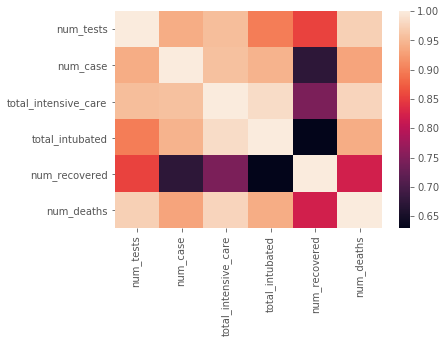

In [ ]:
heatmap(corr,
        xticklabels=dataset_shifted.columns,
        yticklabels=dataset_shifted.columns)

In [ ]:
X = dataset_scaled.iloc[:, [1,4]]
y = dataset_scaled.iloc[:,[2,3]]

In [ ]:
X

,num_case,num_recovered
0,0.000000,0.000000
1,0.028968,0.000000
2,0.080266,0.000000
3,0.025347,0.000000
4,0.035405,0.000000
5,0.079260,0.014270
6,0.207001,0.000000
7,0.382619,0.008782
8,0.309193,0.015368
9,0.331523,0.019210


In [ ]:
lr = LinearRegression()
lr.fit(X.values, y.values)
y_predicted_lr = lr.predict(X.values)
print(mean_squared_error(y.values, y_predicted_lr))
print(r2_score(y.values, y_predicted_lr))

0.012063532495168398
0.9162630883651932


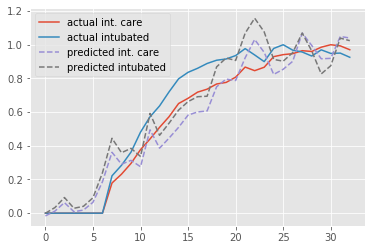

In [ ]:
%matplotlib inline
ax = y.plot(linestyle='-')
pd.DataFrame(y_predicted_lr,columns=y.columns).plot(ax=ax,linestyle='--')
ax.legend(['actual int. care','actual intubated','predicted int. care','predicted intubated'])

plt.plot(dataset_shifted.index.values, y.values, label='actual')
plt.plot(dataset_shifted.index.values, y_predicted_lr, label='predict')
plt.xticks(pd.date_range(dataset.index.values[0],
                         dataset.index.values[-1],
                         freq='W'),
           rotation=90)
plt.title('LR Model')
plt.xlabel('Day')
plt.ylabel('Number of deaths')
plt.legend()
#plt.savefig("outputs/lr.png")

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(75),max_iter=1000,learning_rate_init=0.10, random_state=42)
mlp.fit(X.values, y.values)
y_predicted_mlp = mlp.predict(X.values)


In [ ]:
# Model evaluation
r2_mlp = r2_score(y.values, y_predicted_mlp)
print("mean_squared_error: ", mean_squared_error(y.values, y_predicted_mlp))
print("r2_score: ", r2_score(y.values, y_predicted_mlp))

mean_squared_error:  0.00545122621311585
r2_score:  0.9619569390759679


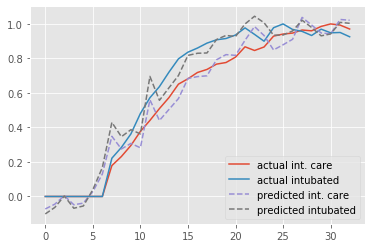

In [ ]:
ax = y.plot(linestyle='-')
pd.DataFrame(y_predicted_mlp,columns=y.columns).plot(ax=ax,linestyle='--')
ax.legend(['actual int. care','actual intubated','predicted int. care','predicted intubated'])
plt.savefig('comparisons.png')

In [ ]:
mlp.coefs_[0].round(2)

array([[-0.74,  0.28,  0.  , -0.34, -0.81,  0.  , -0.84, -0.61, -0.  ,
        -0.37, -0.44,  0.67,  0.29, -0.52, -0.  , -0.48,  0.  ,  0.  ,
        -0.  , -0.27,  0.24,  0.01, -0.5 , -0.  , -0.3 ,  0.01, -0.33,
         0.  , -0.66,  0.  , -0.  ,  0.  , -0.83, -0.49, -0.34,  0.28,
        -0.76, -0.82, -0.03, -0.  ,  0.01, -0.71, -0.73, -0.14, -0.  ,
        -0.15, -0.7 , -0.69,  0.16, -0.89,  0.45, -0.28, -0.35, -0.75,
        -0.54, -0.01,  0.01, -0.76,  0.  ,  0.  , -0.62, -0.72,  0.26,
        -0.  , -0.71, -0.57, -0.42, -0.29, -0.57,  0.55,  0.16, -0.86,
        -0.01, -0.42, -0.  ],
       [-0.31, -0.11,  0.  , -0.48, -0.81, -0.01, -0.47, -0.94,  0.  ,
        -0.68, -0.45,  0.3 ,  0.18, -0.12, -0.  , -0.6 , -0.  ,  0.  ,
         0.  ,  0.16,  0.08,  0.  , -0.  , -0.  , -0.62, -0.  ,  0.06,
         0.  , -0.68, -0.01, -0.  ,  0.  , -0.45, -0.92, -0.83, -0.22,
        -0.79, -0.36,  0.16,  0.  , -0.01, -0.51, -2.13, -0.19, -0.  ,
         0.09, -0.38, -0.73, -0.06,  0.1 , -0.0

In [ ]:
mlp.coefs_[0].round(2)

In [ ]:
mlp.intercepts_

[array([-0.5515452 , -0.11333755, -0.19825183, -0.45484947, -0.48890249,
        -0.1440081 , -0.50291686, -0.66983935, -0.14647447, -0.19246126,
        -0.58384299,  0.18552392, -0.05046508, -0.65957158, -0.22873734,
        -0.13710052, -0.10005679, -0.17501375, -0.25638089, -0.28730408,
         0.01332157, -0.26988444, -0.59225347, -0.15269482, -0.29059759,
        -0.18179814, -0.20952129, -0.06323458, -0.55478126, -0.20236862,
        -0.08873115, -0.21579407, -0.43138111, -0.58269857, -0.73415711,
        -0.07702199, -0.58976034, -0.56820232, -0.30562882, -0.14412142,
        -0.22716687, -0.57515752,  0.51618121, -0.25075422, -0.08986814,
        -0.43643633, -0.39985303, -0.59529097,  0.07103813, -0.67375016,
        -0.08370917, -0.66933847, -0.78793017, -0.38982761, -0.53960357,
        -0.27401064, -0.22249466, -0.50773649, -0.27631943, -0.18936765,
        -0.51284233, -0.41469139, -0.08961235, -0.15393783, -0.37951062,
        -0.74570126, -0.60751003, -0.39756007,  0.4